In [2]:
import csv

# Nombre del archivo de entrada y salida
input_file = "../trajbert/infer_result/humob/hidden_percent_variability.txt"  # Cambia esto al nombre de tu archivo de texto
output_file = "../data/humob/percent_variability_analisys.csv"

# Inicializar listas para guardar los datos
masked_percentages = []
accuracy = []
top_3 = []
fuzzy_accuracy = []
manhattan_distance = []

# Leer el archivo de texto
with open(input_file, "r") as file:
    lines = file.readlines()
    current_metric = None

    for line in lines:
        line = line.strip()
        if "Fuzzy-Accuracy:" in line:
            current_metric = "fuzzy_accuracy"
        elif "Top 3:" in line:
            current_metric = "top_3"
        elif "Accuracy:" in line:
            current_metric = "accuracy"
        elif "Mean Manhattan distance:" in line:
            current_metric = "manhattan"
        elif line.startswith("-"):  # Procesar los valores
            percent, value = line.split(":")
            percent = percent.strip("- ").replace("%", "")
            value = float(value.strip())

            if current_metric == "accuracy":
                masked_percentages.append(int(percent))
                accuracy.append(value)
            elif current_metric == "fuzzy_accuracy":
                fuzzy_accuracy.append(value)
            elif current_metric == "manhattan":
                manhattan_distance.append(value)
            elif current_metric == "top_3":
                top_3.append(value)

# Escribir los datos en un archivo CSV
with open(output_file, "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    # Escribir encabezados
    writer.writerow(["percentage", "accuracy", "top-3", "fuzzy-acc", "manhattan"])
    
    # Escribir filas
    for i in range(len(masked_percentages)):
        writer.writerow([
            masked_percentages[i],
            accuracy[i],
            top_3[i],
            fuzzy_accuracy[i],
            manhattan_distance[i]
        ])

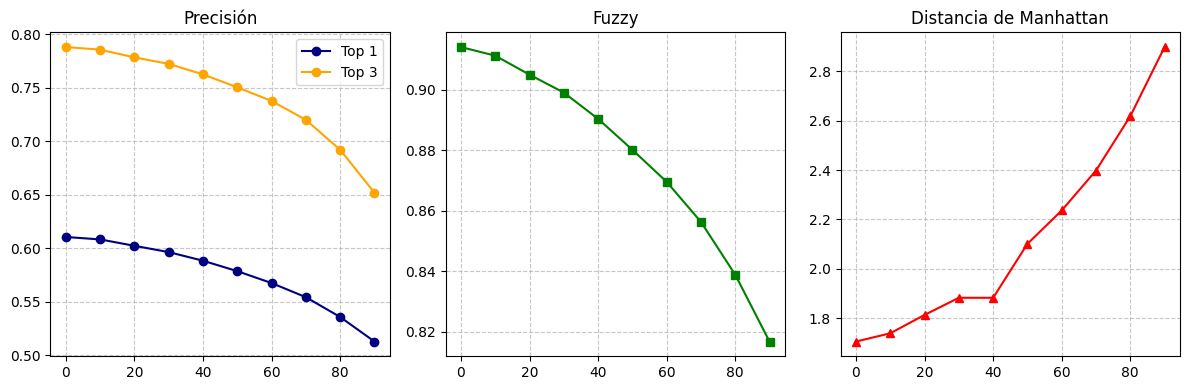

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo CSV
input_file = "../data/humob/percent_variability_analisys.csv"  # Cambia al nombre de tu archivo CSV
data = pd.read_csv(input_file)

# Configuración de tamaño de figura
plt.figure(figsize=(12, 4))  # Ancho más grande para mostrar los gráficos uno al lado del otro

# Gráfico de Accuracy
# plt.subplot(1, 3, 1)  # 1 fila, 3 columnas, posición 1
# plt.plot(data["percentage"], data["accuracy"], label="Precisión", marker="o", color="steelblue")
# plt.plot(data["percentage"], data["top-3"], label="Top 3", marker="o", color="mediumseagreen")
# plt.title("Precisión", fontsize=12)
# # plt.xlabel("Porcentaje enmascarado (%)", fontsize=12)
# # plt.ylabel("Precisión", fontsize=12)
# plt.grid(True, linestyle="--", alpha=0.7)

plt.subplot(1, 3, 1)  # 1 fila, 3 columnas, posición 1
plt.plot(data["percentage"], data["accuracy"], label="Top 1", marker="o", color="navy")
plt.plot(data["percentage"], data["top-3"], label="Top 3", marker="o", color="orange")
plt.title("Precisión", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.7)

# Gráfico de Fuzzy Accuracy
plt.subplot(1, 3, 2)  # 1 fila, 3 columnas, posición 2
plt.plot(data["percentage"], data["fuzzy-acc"], label="Fuzzy", marker="s", color="green")
plt.title("Fuzzy", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)

# Gráfico de Manhattan Distance
plt.subplot(1, 3, 3)  # 1 fila, 3 columnas, posición 3
plt.plot(data["percentage"], data["manhattan"], label="Distancia de Manhattan", marker="^", color="red")
plt.title("Distancia de Manhattan", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)

# Ajustar diseño para que los gráficos no se solapen
plt.tight_layout()

# Mostrar las gráficas
plt.show()

# Crear figura con 3 subgráficos
# plt.figure(figsize=(18, 6))

# # Gráfico de Accuracy
# plt.subplot(1, 3, 1)  # 1 fila, 3 columnas, posición 1
# plt.plot(data["percentage"], data["accuracy"], label="Precisión", marker="o", color="navy")
# plt.plot(data["percentage"], data["top-3"], label="Top-3 Precisión", marker="o", color="orange")
# plt.title("Precisión y Top-3 Precisión", fontsize=14)
# plt.xlabel("Porcentaje enmascarado (%)", fontsize=12)
# plt.ylabel("Valores", fontsize=12)
# plt.legend(fontsize=10)
# plt.grid(True, linestyle="--", alpha=0.7)

# # Gráfico de Fuzzy-Accuracy
# plt.subplot(1, 3, 2)  # 1 fila, 3 columnas, posición 2
# plt.plot(data["percentage"], data["fuzzy-acc"], label="Fuzzy Precisión", marker="s", color="teal")
# plt.title("Fuzzy Precisión", fontsize=14)
# plt.xlabel("Porcentaje enmascarado (%)", fontsize=12)
# plt.ylabel("Valores", fontsize=12)
# plt.legend(fontsize=10)
# plt.grid(True, linestyle="--", alpha=0.7)

# # Gráfico de Distancia de Manhattan
# plt.subplot(1, 3, 3)  # 1 fila, 3 columnas, posición 3
# plt.plot(data["percentage"], data["manhattan"], label="Distancia de Manhattan", marker="^", color="purple")
# plt.title("Distancia de Manhattan", fontsize=14)
# plt.xlabel("Porcentaje enmascarado (%)", fontsize=12)
# plt.ylabel("Valores", fontsize=12)
# plt.legend(fontsize=10)
# plt.grid(True, linestyle="--", alpha=0.7)

# # Ajustar espacio entre gráficos
# plt.tight_layout()

# # Mostrar el gráfico
# plt.show()
